# **Support Vector Machines (SVM) en `scikit-learn`**


---
---


### **Generalidades de SVM**

* El m√©todo SVM nace como un m√©todo de clasificaci√≥n lineal y binaria.

* Es un m√©todo de aprendizaje supervisado, es decir, los datos del problema consisten en un par (vector de caracter√≠sticas, etiquetas asociadas).

* Las SVM se fundamentan en el concepto de *Maximal Margin Classifier*, y este a su vez se fundamenta en el de hiperplano.

* Aunque originalmente solo abordaba un problema de clasificaci√≥n binaria, se ha extendido a clasificaci√≥n m√∫ltiple y regresi√≥n.

* As√≠ mismo, la limitaci√≥n a problemas lineales se extiende a clasificaci√≥n no lineal mediante el [kernel trick](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf).

---


### **Sobre este notebook**

Se aborda la teor√≠a de los clasificadores binarios SVM lineales y no lineales. El caso multiclase se deja para otro notebook.

Al final, como ejercicio, se aborda un problema de clasificaci√≥n binaria no lineal mediante un m√©todo de kernel.


---

### **La frontera lineal de decisi√≥n: Hiperplano de separaci√≥n**

En un espacio $d-$dimensional, un hiperplano es un subespacio plano $(d-1)-$dimensional que dado el conjunto de par√°metros $\{w_j \in \mathbb{R}\}_{j=0}^d$, para una $d-$tupla $\vec{x}=(x_1, \dots , x_d)$, su ecuaci√≥n es:

$$
w _0 +\sum _{k=1}^d w _k x_k=0
$$

Este hiperplano separa la regi√≥n donde el conjunto $\{ x_k \}$ cumple que $w _0 +\sum _{k=1}^d w _k x_k < 0$, de la regi√≥n donde $\{ x_k \}$ cumple que $w _0 +\sum _{k=1}^d w _k x_k > 0$

---


### **Clasificaci√≥n binaria mediante un hiperplano: Caso linealmente separable perfectamente (l.s.p)**

Sea un conjunto de datos $D$, de $N$ observaciones con $d$ predictores (caracter√≠sticas) cada una, cuya variable de respuesta es binaria, con niveles de respuesta definidos por $\{+1,-1\}$:

$$
D=\{ \vec{x}^i=(x_1 ^i, \dots , x_d ^i ) \in \mathbb{R}^d, y_i = \pm 1 \}_{i=1}^N
$$

En un problema lineal se emplean hiperplanos para construir un clasificador que permita predecir a qu√© grupo pertenece una observaci√≥n en funci√≥n de sus predictores.

Si los $\vec{x}^i$ son linealmente separables perfectamente en las dos clases $\{+1,-1\}$, el hiperplano conduce a la siguiente clasificaci√≥n:

$$
\begin{cases}
w _0 +\sum _{k=1}^d w _k x_k^i > 0 \text{, si } y_i=1 \\
w _0 +\sum _{k=1}^d w _k x_k^i < 0 \text{, si } y_i=-1
\end{cases}
$$

Estas dos expresiones anteriores se pueden simplificar mediante una sola expresi√≥n:

$$
y_i(w _0 +\sum _{k=1}^d w _k x_k^i) > 0 \text{, } ‚àÄ i=1, \dots, N
$$

El clasificador m√°s simple consiste en asignar cada $\vec{x}^i$ a una de las dos clases dependiendo el lado del hiperplano.

Dado un vector de caracter√≠sticas $\vec{x} \in \mathbb{R}^d$ y el vector de pesos asociado $\vec{w}=(w_0, w_1, \dots , w_d) \in \mathbb{R}^{d+1}$ , definimos la forma anal√≠tica del modelo de clasificaci√≥n lineal binaria mediante:

\begin{align}
f : \mathbb{R}^d &\to \mathbb{R} \\
\vec{x} &\to w_0 + \sum_{k=1}^d w_k x_k
\end{align}

En donde la clasificaci√≥n de la observaci√≥n $\vec{x}^*$ es acorde al signo:

$$
sign\{f(\vec{x}^*)\}=\begin{cases}
+1 \text{, } w_0 + \sum_{k=1}^d w_k x_k >0 \text{ ($\vec{x}^*$ pertenece a la clase +1)}\\
-1 \text{, } w_0 + \sum_{k=1}^d w_k x_k <0 \text{ ($\vec{x}^*$ pertenece a la clase -1)}
\end{cases}
$$



---

### **Maximal Margin Hyperplane**


La definici√≥n del hiperplano para casos linealmente separables perfectamente conduce a una infinidad de valores $\{w_j\}$, $\{x_k\}$ que cumplen que $w _0 +\sum _{k=1}^d w _k x_k=0$. Por ello, se necesita hallar al clasificador √≥ptimo, es decir, el hiperplano √≥ptimo de separaci√≥n, que recibe el nombre de *Maximal Margin Hyperplane* (MMH):

* El MMH es el hiperplano que se encuentra m√°s alejado de todos los datapoints de entrenamiento.

* Se obtiene calculando la distancia perpendicular de cada $\vec{x}^i$ a un hiperplano.

* A la distancia desde el hiperplano hasta los puntos m√°s cercanos de cada clase se le llama margen.

* Entonces, el MMH es el hiperplano con mayor margen asociado.

* De las ideas anteriores nace la necesidad de plantear un problema de optimizaci√≥n mediante la maximizaci√≥n del margen.



---

### **El margen y las condiciones de separabilidad**

Definimos el margen de un hiperplano como la distancia entre las observaciones m√°s cercanas de cada clase con respecto a este hiperplano, por ello el problema a resolver en las SVM es maximizar el margen para mejorar la generalizaci√≥n del modelo.


Sea $\vec{w}^T \vec{x}+b=0$ la ecuaci√≥n del hiperplano de separaci√≥n √≥ptimo, para que separe las clases correctamente en el caso binario linealmente separable perfectamente, se impone

$$
y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

Por lo tanto, si $y_i =1$, se tiene que $\vec{w}^T \vec{x}+b \geq 1$.

Y si $y_i =-1$, se tiene que $\vec{w}^T \vec{x}+b \leq 1$.

Los puntos que cumplen com ambos casos, es decir, $y_i(\vec{w}^T \vec{x}+b)=1$ son llamados vectores de soporte. Estos se interpretan como los vectores de caracter√≠sticas del conjunto de entrenamiento m√°s cercanos al hiperplano de separaci√≥n.

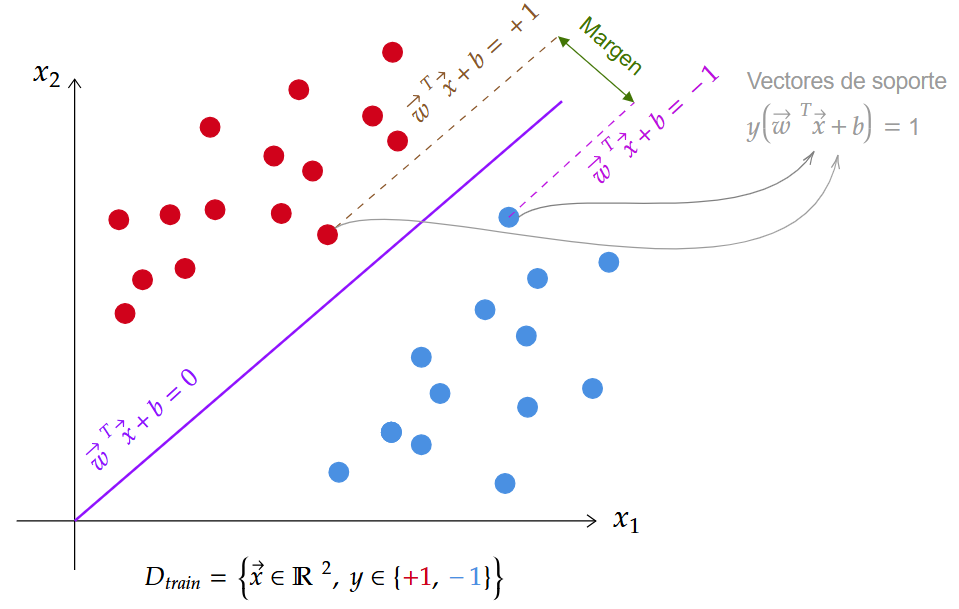


---


### **El problema de optimizaci√≥n: Maximizaci√≥n del margen**

Sean dos hiperplanos $\vec{w}^T \vec{x}+c_1=0$  y  $\vec{w}^T \vec{x}+c_2=0$, en un espacio euclidiano la distancia entre ellos es:

$$
D=\frac{|c_2 - c_1|}{||\vec{w}||}
$$

De acuerdo al problema binario linealmente separable perfectamente, se tienen los siguientes hiperplanos asociados a las clases:

$$
\begin{cases}
\vec{w}^T \vec{x}+b=1 \text{, clase +1} \\
\vec{w}^T \vec{x}+b=-1 \text{, clase -1}
\end{cases}
$$

De acuerdo a la forma general, $\vec{w}^T \vec{x}+c_i=0$, tenemos que $c_1=-1$ y $c_2=1$, por lo que

$$
D=\frac{|1-(-1)|}{||\vec{w}||}
$$

Por lo que el margen es:

$$
M=\frac{2}{||\vec{w}||}
$$



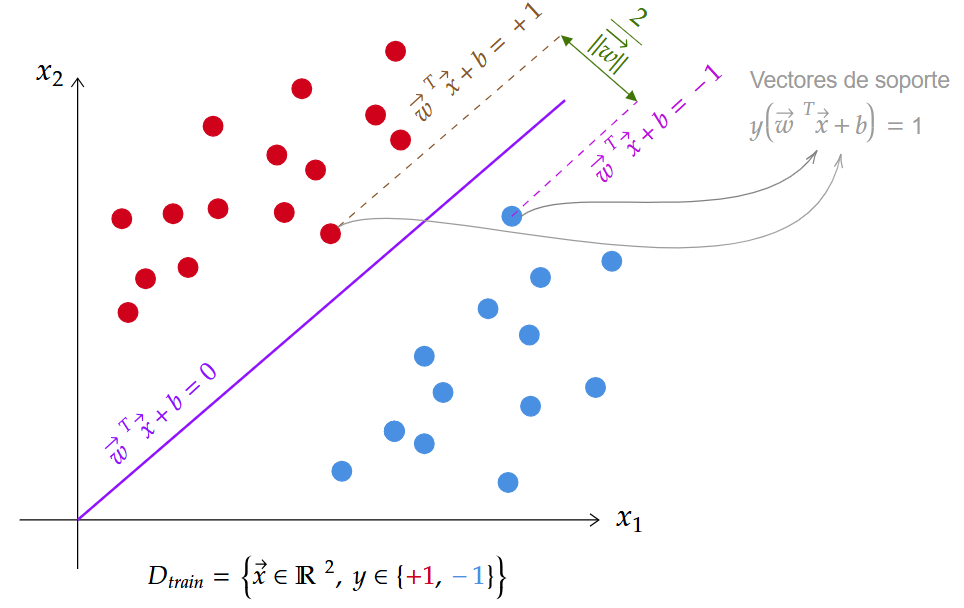

Entonces, el problema de optimizaci√≥n consiste en hallar

$$
Œ≥_i=ArgMax_{\vec{w},b}\{\frac{2}{||\vec{w}||} \} \text{, sujeto a } y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

A su vez, este problema es equivalente a

$$
Œ≥_i=ArgMin_{\vec{w},b}\{\frac{1}{2} ||\vec{w}||^2 \} \text{, sujeto a } y_i(\vec{w}^T \vec{x}+b) \geq 1
$$

Por lo que hablamos de un problema de optimizaci√≥n cuadr√°tica convexa con restricciones lineales, el cual resolveremos mediante multiplicadores de Lagrange.

Definimos el lagrangiano:

$$
\mathcal{L}(\vec{w},b,\alpha)= \frac{1}{2} ||\vec{w}||^2- ‚àë_{i=1}^N \alpha _i[y_i(\vec{w}^T \vec{x}_i+b)-1] \text{, con } \alpha _i \geq 0
$$

Paso 1:

$$
‚àá_{\vec{w}}\mathcal{L}= \vec{w}- ‚àë_{i=1}^N \alpha _i y_i \vec{x}_i=\vec{0} ‚áí \vec{w}= ‚àë_{i=1}^N \alpha _i y_i \vec{x}_i
$$

Paso 2:

$$
\frac{‚àÇ\mathcal{L}}{‚àÇb}=- ‚àë_{i=1}^N \alpha _i y_i=0
$$

Reemplazando en $\mathcal{L}(\vec{w},b,\alpha)$, obtenemos la forma dual del problema:

$$
\alpha ^*=ArgMax_{\alpha}\{‚àë_{i=1}^N \alpha _i- \frac{1}{2}‚àë_{i=1}^N‚àë_{j=1}^N \alpha _i \alpha _j y_i y_j \vec{x}^T _i \vec{x}_j\}
$$

Sujeto a $‚àë_{i=1}^N \alpha _i y_i=0 $ y $\alpha _i \geq 0$.

---


### **El clasificador SVM**

El clasificador resultante del problema anterior se obtiene, para una muestra $\vec{x}_k$ como:

$$
f(\vec{x}_k)= sign\{‚àë_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b\}=\begin{cases}
-1 \text{, si } ‚àë_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b <0 \\
+1 \text{, si } ‚àë_{i=1}^N \alpha _i y_i \vec{x}^T _i \vec{x}_k +b >0
\end{cases}
$$

Y los vectores de soporte son los $\vec{x} _i$ tal que $\alpha _i >0$, los cuales determinan la posici√≥n del hiperplano de separaci√≥n.

---


### **SVM m√°s all√° del caso l.s.p: Soft Margin SVM**

En problemas del mundo real no suele haber una separaci√≥n lineal de forma perfecta, por lo que usar un hiperplano de separaci√≥n conduce a errores en la clasificaci√≥n. Esto puede asociarse a dos casos:

1) El problema no es lineal y se aborda mediante [m√©todos de kernels](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf). Este caso se abordar√° m√°s adelante.

2) El problema es aproximadamente linealmente separable. Es decir, se extiende el concepto de MMH para obtener un hiperplano que separe las clases, pero permitiendo un error de clasificaci√≥n.

Al modelo que aborda el caso del segundo punto se le conoce como Soft Margin SVM y es el que abordaremos en esta ocasi√≥n.

---


### **Maximal Margin Hyperplane vs Soft Margin**

* A√∫n bajo condiciones ideales, el MMH presenta dos inconvenientes:

    1. Es sensible a variaciones en los datos, lo cual implica poca robustez del modelo.

    2. Est√° ajustado perfectamente a las observaciones, lo cual conlleva al overfitting.

* Es preferible crear un hiperplano clasificador m√°s robusto (aunque no perfecto) y con mayor capacidad predictiva ante nuevos datos (menos overfitting).

* Soft Margin permite ciertas observaciones en el lado incorrecto del hiperplano.


---


### **El hiperpar√°metro $C$ en Soft Margin SVM**

El m√©todo Soft Margin incluye un hiperpar√°metro, $C$, el cual controla el n√∫mero de violaciones del hiperplano que se toleran en el proceso de ajuste. Se le conoce como el hiperpar√°metro de regularizaci√≥n.

* Si $C ‚Üí0$, menos se penalizan los errores, entonces hay m√°s observaciones $\vec{x}$ en el lado incorrecto del hiperplano (margen m√°s ancho, m√°s bias, menos varianza).

* Si $C ‚Üí ‚àû$, no se permiten violaciones, por lo que el modelo es equivalente al MMH (menor margen, menos bias, m√°s varianza).

* $C$ controla el balance bias-variance del modelo.

* En la pr√°ctica el $C$ √≥ptimo se determina mediante alg√∫n algoritmo de [Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

---


### **Problema de optimizaci√≥n de Soft Margin SVM**

* Antes:

En el caso l.s.p ten√≠amos que dado un conjunto de datos de entrenamiento $D_{train}=\{\vec{x}_i \in \mathbb{R}^d, y_i \in \{+1,-1\}\}_{i=1}^N$,  el objetivo es encontrar los par√°metros $\vec{w} \in \mathbb{R}^d$ y $b \in \mathbb{R}$ √≥ptimos tal que se minimice la funci√≥n objetivo $\frac{1}{2} ||\vec{w}||^2$ (lo cual es equivalente a maximizar el margen), con la restricci√≥n $y_i (\vec{w}^T \vec{x}_i+b) \geq 1$. Entonces tenemos que:

$$
\begin{cases}
\text{Si } y_i=1 \Rightarrow \vec{w}^T \vec{x}_i+b \geq 1\\
\text{Si } y_i=-1 \Rightarrow \vec{w}^T \vec{x}_i+b \leq 1
\end{cases}
$$

* Ahora:

Siendo que el enfoque ahora una penalizaci√≥n en los errores de clasificaci√≥n, las restricciones de desigualdad deben adaptarse a los datos que no son linealmente separables. Esto se hace introduciendo variables de holgura (slack variables, $ùú∫$) con valores positivos en las restricciones del problema de optimizaci√≥n. Sea $ùú∫ >0$:

$$
\begin{cases}
\text{Si } y_i=1 \Rightarrow \vec{w}^T \vec{x}_i+b \geq 1- ùú∫ _i\\
\text{Si } y_i=-1 \Rightarrow \vec{w}^T \vec{x}_i+b \leq 1 + ùú∫ _i
\end{cases}
$$

De tal forma que el problema de minimizaci√≥n asociado a Soft Margin es:

$$
ArgMin_{\vec{w},b,ùú∫}\{\frac{1}{2}||\vec{w}||^2 + C \sum _{i=1}^N ùú∫_i\}
$$


Entonces, se maximiza el margen minimizando $\frac{1}{2}||\vec{w}||^2 = \frac{1}{2}\vec{w}^T \vec{w}$ mientras se toma en cuenta la penalizaci√≥n cuando una parte de los vectores de caracter√≠sticas es mal clasificada.

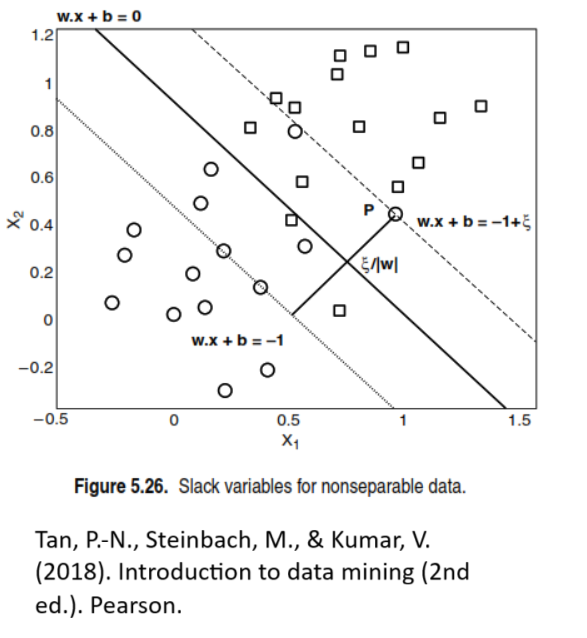



---


### **SVM no lineales**

Soft Margin SVM consigue buenos resultados cuando la separaci√≥n entre clases es aproximadamente lineal, pero cuando no es lineal, su capacidad decrece.

En un escenario de separaci√≥n no lineal, se transforma la representaci√≥n de los datos a un espacio de mayor dimensi√≥n donde el problema sea lineal. Esta transformaci√≥n adecuada es determinada mediante el [kernel trick](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Herramientas%20Te%C3%B3ricas/Kernels.pdf) (m√©todos de kernels).

* Cada kernel tiene hiperpar√°metros cuyo valor √≥ptimo se encuentra mediante alg√∫n algoritmo de [Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

* En general, no hay un mejor kernel a usar que el resto, depende de la naturaleza y necesidades del problema.

* Comunmente se recomienda probar el kernel gaussiano pues es flexible ante clasificadores lineales y clasificadores complejos.


---


### **El problema de optimizaci√≥n en SVM no lineales**

El problema de optimizaci√≥n se define en hallar

$$
\vec{\alpha}^*=ArgMin_{Œ±}\{\frac{1}{2}\vec{\alpha}^T Q \vec{\alpha}- \vec{e}^T \vec{\alpha}\}
$$

Sujeto a $\vec{y}^T \vec{\alpha} =0$ y $0 \leq \alpha _i \leq C$, para cada $i \in \{1, \dots , N\}$.

* $\vec{y} \in \mathbb{R}^N$ es el vector de etiquetas.

* $\vec{\alpha} \in \mathbb{R}^N$ es el vector cuyas entradas $\alpha _i$ son los coeficientes duales acotados por $C$.

* $\vec{e} \in \mathbb{R}^N$ es el vector de unos.

* $Q \in \mathbb{R}^{N \times N}$ es una matriz positiva semidefinida tal que $[Q]_{ij}=y_i y_j k(\vec{x}_i,\vec{x}_j)$, en donde el kernel es $k(\vec{x}_i,\vec{x}_j)= \vec{\phi}(\vec{x}_i)^T \vec{\phi}(\vec{x}_j)$.

* $\vec{x}_i$ y $\vec{x}_j$ son los vectores de entrenamiento que se mapean a un espacio de mayor dimensi√≥n mediante $\vec{\phi}$.


---


### **Clasificaci√≥n mediante SVM no lineal**

Resuelto el problema de optimizaci√≥n, el clasificador final de un vector de caracter√≠sticas resulta en:

$$
f(\vec{x}) = sign \{\sum _i y_i \alpha _i k(\vec{x}_i,\vec{x}_j) +b \}
$$

---


### **Sintaxis de SVM en `scikit-learn`**

```
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

modelo = SVC( C, kernel, hiperpar√°metro_kernel(si es el caso) )

#Entrenamiento:
modelo.fit(X_train, y_train)

#Predicci√≥n:
y_pred = modelo.predict(X_test)
```

El argumento `C` corresponde al hiperpar√°metro de regularizaci√≥n, y recibe un valor flotante  positivo.

Por otro lado, `kernel` tambi√©n puede verse como un hiperpar√°metro, y recibe una string, y en algunos casos, este argumento se acompa√±a de otro hiperpar√°metro (que puede tomar distintos valores) dependiendo del kernel:

*  `kernel = 'linear'`
*  `kernel = 'poly', degree`$‚àà \mathbb{N}^+$
*  `kernel = 'rbf', gamma`$\in$ {`'scale'`, `'auto'`, flotante positivo}. Este es el valor por default.

    Teniendo que el kernel gaussiano es $k(\vec{x}_i, \vec{x}_j)=\exp(-\gamma||\vec{x}_i - \vec{x}_j||^2)$, cuando `gamma='scale'` (es el valor por default), se tiene que:

    $$
    \gamma =\frac{1}{d \cdot \overline{Var}(X)}
    $$

    Con $d$ el n√∫mero de caracter√≠sticas, es decir, la dimensi√≥n de los vectores de caracter√≠sticas, $\vec{x} \in \mathbb{R}^d$. Y $\overline{Var}(X)$ la varianza media de los vectores de caracter√≠sticas ($X$ denota la matriz de dise√±o).

    Por otro lado, cuando `gamma='auto'`, se tiene que:

    $$
    \gamma =\frac{1}{d}
    $$


*  `kernel = 'sigmoid'`
*  `kernel= 'precomputed'`. Se usa cuando se quiere tomar una funci√≥n de similitud $k(\vec{x}, \vec{x}') = \vec{\phi}(\vec{x})^T \vec{\phi}(\vec{x}')$ personalizada o definida por el usuario.

---


### **Proyecto. Clasificaci√≥n Binaria No Lineal: Importancia m√©dica en especies mexicanas de ara√±as mediante SVM**

Trabajaremos con una base de datos con informaci√≥n sobre ara√±as en el territorio mexicano que ya fue preprocesada anteriormente.

Desarrollaremos un modelo de clasificaci√≥n SVM binaria con el fin de determinar si una ara√±a es de importancia m√©dica o no. Esta variable es la etiqueta del problema.


# **Importaci√≥n y exploraci√≥n del dataset**

In [170]:
import chardet

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/SVM/Ara√±as2.csv'

with open(file_path, "rb") as f:
    rawdata = f.read(5000)

result = chardet.detect(rawdata)
result

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv(file_path)
display(df.head())
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(df.info())
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Tenemos {df.shape[0]} vectores de caracter√≠sticas con {df.shape[1]} caracter√≠sticas')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(df.columns)

Tama√±o corporal (mm) Color principal  N√∫mero de ojos Importancia M√©dica  \
0                  21.9          rojizo               8                 No   
1                  47.8        amarillo               8                 No   
2                  37.9           negro               6                 Si   
3                  31.9          rojizo               8                 No   
4                  12.0          rojizo               8                 No   

    H√°bitat           Especie Patas con bandas de color Estado de observaci√≥n  \
0  desierto        Ara√±a lobo                        no               Yucat√°n   
1    bosque   Ara√±a de jardin                        Si       Baja California   
2    urbano  Ara√±a violinista                        no       Baja California   
3    bosque         Tar√°ntula                        Si               Yucat√°n   
4    bosque   Ara√±a de jardin                        Si                Oaxaca   

  Encontrada en rinc√≥n de casa Forma del abdomen  N√∫mero de Patas  
0                           no           ovalado                8  
1                           no           redondo                8  
2                           no        triangular                8  
3                           no        triangular                8  
4                           no           ovalado                8

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tama√±o corporal (mm)          133 non-null    float64
 1   Color principal               133 non-null    object 
 2   N√∫mero de ojos                133 non-null    int64  
 3   Importancia M√©dica            133 non-null    object 
 4   H√°bitat                       133 non-null    object 
 5   Especie                       133 non-null    object 
 6   Patas con bandas de color     133 non-null    object 
 7   Estado de observaci√≥n         133 non-null    object 
 8   Encontrada en rinc√≥n de casa  133 non-null    object 
 9   Forma del abdomen             133 non-null    object 
 10  N√∫mero de Patas               133 non-null    int64  
dtypes: float64(1)

In [172]:
#Explorando la etiqueta objetivo
print(pd.unique(df['Importancia M√©dica']))
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

#Transformando la columna categ√≥rica 'Importancia M√©dica' en num√©rica para el modelo
df['Importancia M√©dica'] = df["Importancia M√©dica"].map({"No": 0, "Si": 1})
print(df['Importancia M√©dica'].dtype)

['No' 'Si']
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
int64


# **Visualizaci√≥n de datos: ¬øEl dataset es linealmente separable?**

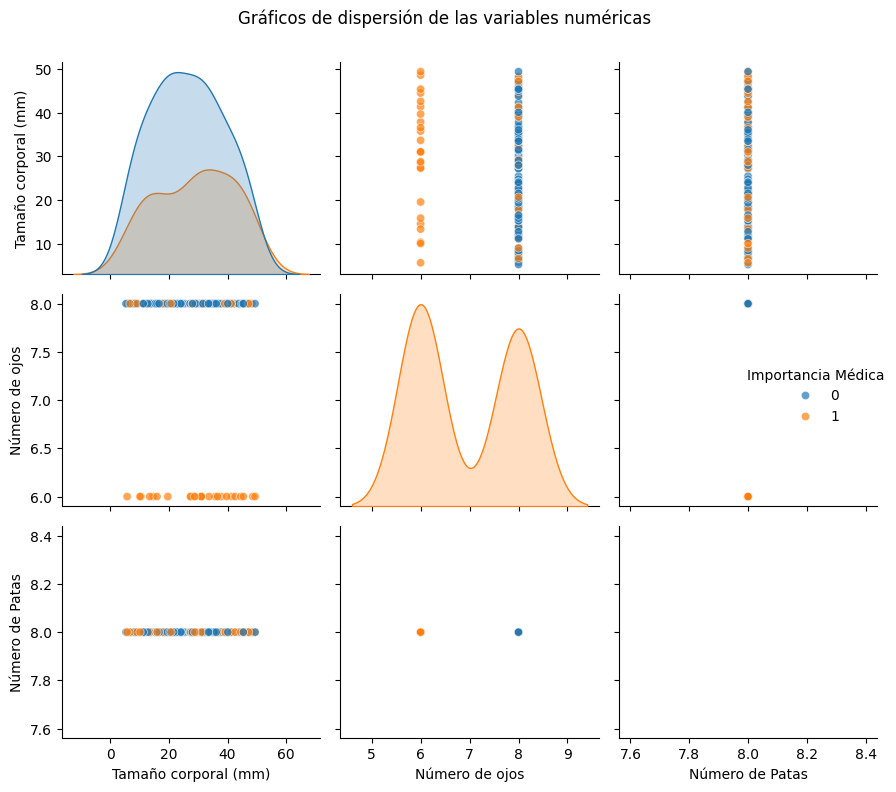

In [173]:
#Aislando las variables num√©ricas en una lista
vars_numericas = ["Tama√±o corporal (mm)", "N√∫mero de ojos", "N√∫mero de Patas"]

#Gr√°ficos de acuerdo a la importancia m√©dica
sns.pairplot(df, vars=vars_numericas, hue="Importancia M√©dica", plot_kws={'alpha':0.7})
plt.tight_layout()
plt.suptitle("Gr√°ficos de dispersi√≥n de las variables num√©ricas", y=1.05)
plt.show()

En el scatterplot podemos ver que los datos no siguen la tendencia de ser linealmente separables, por lo que debemos ajustar un modelo kernelizado.

Usaremos la sugerencia de probar el kernel gaussiano.

# **Preprocesamiento**

La base de datos ya fue limpiada anteriormente, pero ahora es necesario tratar las columnas categ√≥ricas adecuadamente, transform√°ndolas a variables num√©ricas para que el modelo SVM pueda operar sobre estas caracter√≠sticas.

In [174]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Definimos la matriz de dise√±o y el vector de etiquetas
X = df.drop(columns=['Importancia M√©dica'])
y = df["Importancia M√©dica"]

#Aislando las variables categ√≥ricas
var_cat = X.select_dtypes(include=["object"]).columns.tolist()
print(var_cat)

#Transformando a variables dummy mediante OHE
transformador = ColumnTransformer(transformers=[("variables_categ√≥ricas", OneHotEncoder(drop="first"), var_cat)])
#drop="first" se incluye para evitar colinealidad, pues el modelo SVM puede verse afectado con la colinealidad.

['Color principal', 'H√°bitat', 'Especie', 'Patas con bandas de color', 'Estado de observaci√≥n', 'Encontrada en rinc√≥n de casa', 'Forma del abdomen']


# **Determinando el mejor Modelo SVM**

El modelo tiene principalmente dos par√°metros a ajustar para ofrecer el mejor rendimiento, la regularizaci√≥n y el tipo de kernel, y dependiendo del kernel se presentan o no otros hiperpar√°metros a ajustar.



**SVM mediante el Kernel Gaussiano:**

Empezaremos siguiendo la sugerencia de probar el kernel RBF, el cual presenta el hiperpar√°metro $\gamma$.

Para obtener los hiperpar√°metros $C$ y $Œ≥$ √≥ptimos, usaremos el m√©todo [Randomized Search Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf), que es menos costoso computacionalmente que [Grid Search Cross-Validation](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).

Los mejores hiperpar√°metros son: {'ModeloRBF__C': 1, 'ModeloRBF__gamma': 'scale'}
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Las m√©tricas de evaluaci√≥n son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisi√≥n del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


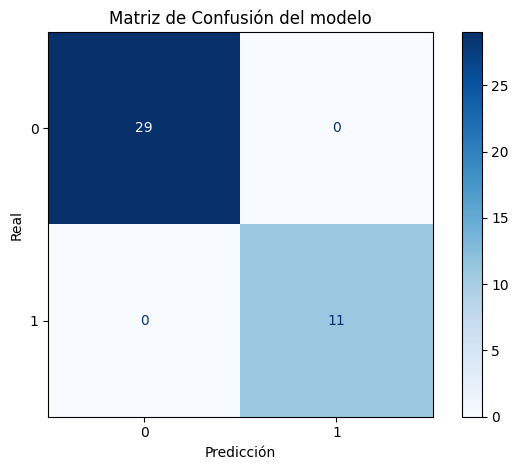

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, f1_score, recall_score, accuracy_score

#Modelo SVM mediante una pipeline
pipeline_rbf = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF", SVC(kernel="rbf"))
])

#Espacio de b√∫squeda de hiperpar√°metros
dis_rbf = {
    "ModeloRBF__C": randint(1, 10),
    "ModeloRBF__gamma": ["scale", "auto"]
}

#Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_rbf = RandomizedSearchCV(
    estimator=pipeline_rbf,
    param_distributions=dis_rbf,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_rbf.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_rbf.predict(X_test)
print("Los mejores hiperpar√°metros son:", RS_rbf.best_params_)
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Las m√©tricas de evaluaci√≥n son:\n {classification_report(y_test, y_pred)}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

accuracy = RS_rbf.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisi√≥n del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_rbf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n del modelo")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Sospechosamente las m√©tricas de error arrojan una clasificaci√≥n ideal, por lo que el [overfitting](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf) parece estar presente.

Para detectarlo vamos a trabajar con la [curva de aprendizaje](https://github.com/Bronquivoide/Proyectos_de_Machine_Learning_/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf).


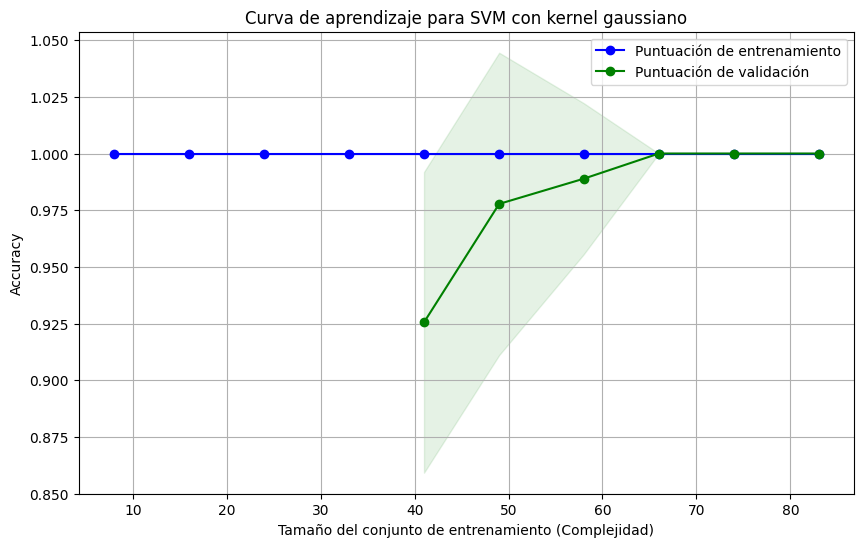

In [176]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Pipeline para la curva
optimos = RS_rbf.best_params_
pipeline_optimo = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF", SVC(kernel="rbf", C=optimos["ModeloRBF__C"], gamma=optimos["ModeloRBF__gamma"]))
])

#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la m√©trica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_optimo,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones est√°ndar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gr√°fica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuaci√≥n de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuaci√≥n de validaci√≥n", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para SVM con kernel gaussiano")
plt.xlabel("Tama√±o del conjunto de entrenamiento (Complejidad)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

En efecto, hay overfitting, por lo que hay que cambiar de par√°metros.

**SVM mediante el Kernel Lineal:**

Los mejores hiperpar√°metros son: {'ModeloLin__C': 1}
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Las m√©tricas de evaluaci√≥n son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisi√≥n del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


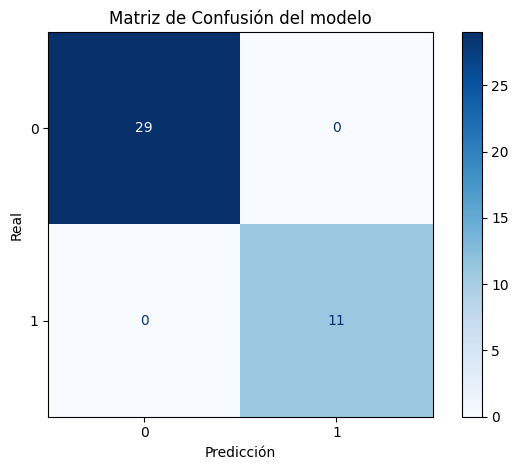

In [177]:
#Modelo SVM mediante una pipeline
pipeline_linear = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloLin", SVC(kernel="linear"))
])

#Espacio de b√∫squeda de hiperpar√°metros
dis_linear = {
    "ModeloLin__C": randint(1, 10),
}

#Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_linear = RandomizedSearchCV(
    estimator=pipeline_linear,
    param_distributions=dis_linear,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_linear.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_linear.predict(X_test)
print("Los mejores hiperpar√°metros son:", RS_linear.best_params_)
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Las m√©tricas de evaluaci√≥n son:\n {classification_report(y_test, y_pred)}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

accuracy = RS_linear.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisi√≥n del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_linear.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n del modelo")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Se tiene el mismo caso con el kernel lineal.

**SVM mediante el Kernel Polinomial:**

Los mejores hiperpar√°metros son: {'ModeloPoly__C': 8, 'ModeloPoly__degree': 1}
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Las m√©tricas de evaluaci√≥n son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisi√≥n del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


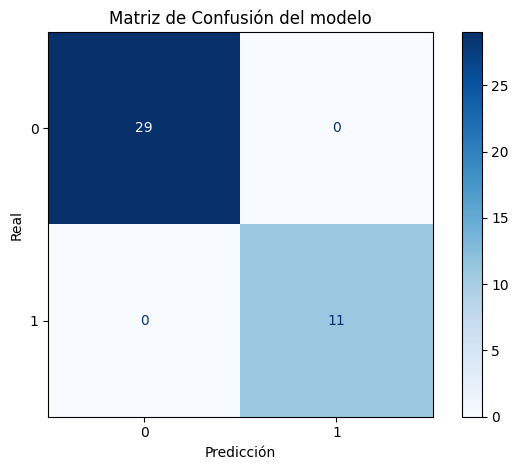

In [178]:
#Modelo SVM mediante una pipeline
pipeline_poly = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloPoly", SVC(kernel="poly"))
])

#Espacio de b√∫squeda de hiperpar√°metros
dis_poly = {
    "ModeloPoly__C": randint(1, 10),
    "ModeloPoly__degree": randint(1, 10)
}

#Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_poly = RandomizedSearchCV(
    estimator=pipeline_poly,
    param_distributions=dis_poly,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_poly.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_poly.predict(X_test)
print("Los mejores hiperpar√°metros son:", RS_poly.best_params_)
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Las m√©tricas de evaluaci√≥n son:\n {classification_report(y_test, y_pred)}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

accuracy = RS_poly.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisi√≥n del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_poly.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n del modelo")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Despu√©s de probar tres kernels y que no desapareciera el overfitting, parece que este no se asocia tanto al par√°metro del kernel, posiblemente se asocie al par√°metro de regularizaci√≥n.

Como solo hemos probado regularizaci√≥n para enteros, vamos a probar con flotantes.

**SVM mediante el kernel gaussiano con una regularizaci√≥n flotante**


Los mejores hiperpar√°metros son: {'ModeloRBF2__C': np.float64(0.8549636717835696), 'ModeloRBF2__gamma': 'scale'}
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Las m√©tricas de evaluaci√≥n son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisi√≥n del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


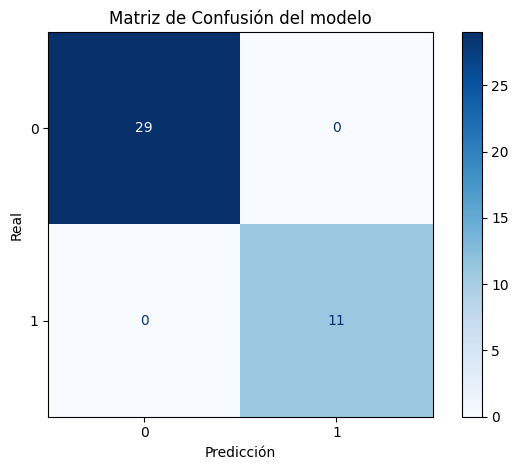

In [179]:
from scipy.stats import loguniform

#Modelo SVM mediante una pipeline
pipeline_rbf2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF2", SVC(kernel="rbf"))
])

#Espacio de b√∫squeda de hiperpar√°metros
dis_rbf2 = {
    "ModeloRBF2__C": loguniform(0.01, 10),
    "ModeloRBF2__gamma": ["scale", "auto"]
}

#Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)


#Randomized Search
RS_rbf2 = RandomizedSearchCV(
    estimator=pipeline_rbf2,
    param_distributions=dis_rbf2,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_rbf2.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_rbf2.predict(X_test)
print("Los mejores hiperpar√°metros son:", RS_rbf2.best_params_)
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Las m√©tricas de evaluaci√≥n son:\n {classification_report(y_test, y_pred)}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

accuracy = RS_rbf2.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisi√≥n del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_rbf2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n del modelo")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

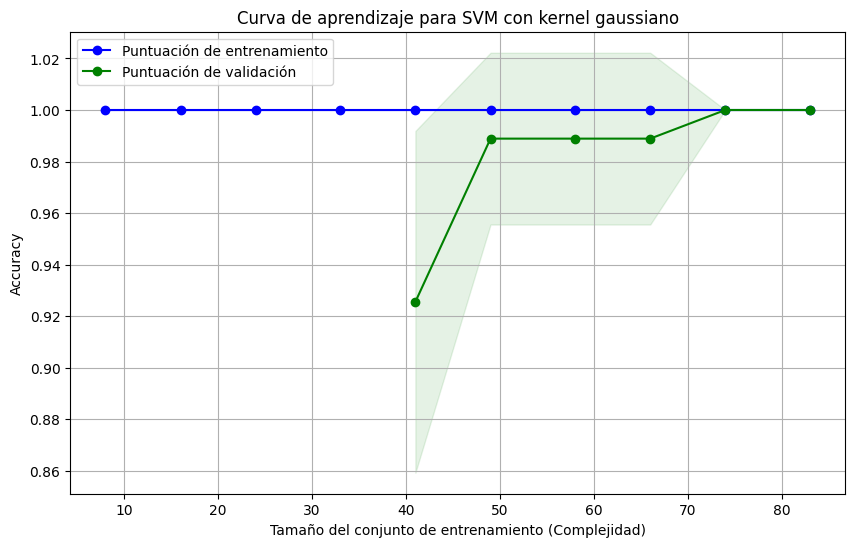

In [180]:
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Pipeline para la curva
optimos2 = RS_rbf2.best_params_
pipeline_optimo2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloRBF2", SVC(kernel="rbf", C=optimos2["ModeloRBF2__C"], gamma=optimos2["ModeloRBF2__gamma"]))
])

#Generando la curva de aprendizaje para observar el posible sobreajuste. Usaremos la m√©trica Accuracy.
train_sizes, train_scores, test_scores = learning_curve(
    pipeline_optimo2,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy')

#Medias y desviaciones est√°ndar de los scores (en este caso Accuracy)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Gr√°fica
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Puntuaci√≥n de entrenamiento", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)

plt.plot(train_sizes, test_mean, label="Puntuaci√≥n de validaci√≥n", color="green", marker="o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

plt.title("Curva de aprendizaje para SVM con kernel gaussiano")
plt.xlabel("Tama√±o del conjunto de entrenamiento (Complejidad)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()

Se redujo el overfitting, pero sigue estando presente.

**SVM mediante el kernel lineal con una regularizaci√≥n flotante**

Los mejores hiperpar√°metros son: {'ModeloLin2__C': np.float64(0.10732381160629177)}
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Las m√©tricas de evaluaci√≥n son:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞
Accuracy del modelo SVM: 1.0
Recall del modelo SVM: 1.0
Precisi√≥n del modelo SVM: 1.0
F1-score del modelo SVM: 1.0
¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞


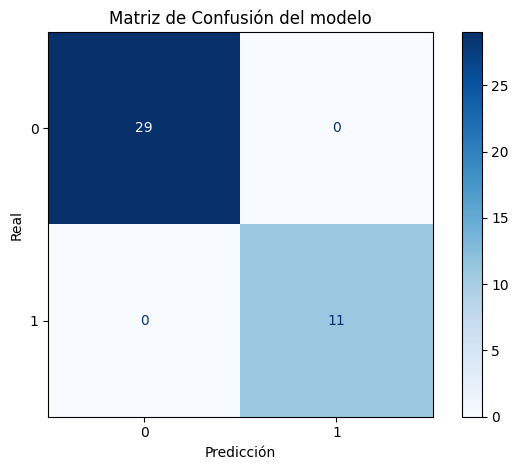

In [181]:
#Modelo SVM mediante una pipeline
pipeline_linear2 = Pipeline(steps=[
    ("Preprocesamiento", transformador),
    ("ModeloLin2", SVC(kernel="linear"))
])

#Espacio de b√∫squeda de hiperpar√°metros
dis_linear2 = {
    "ModeloLin2__C":loguniform(0.01, 10),
}

#Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=170119)

#Randomized Search
RS_linear2 = RandomizedSearchCV(
    estimator=pipeline_linear2,
    param_distributions=dis_linear2,
    n_iter=20,
    cv=10,
    random_state=170119)

#Entrenamiento
RS_linear2.fit(X_train, y_train)

#Evaluando el modelo
y_pred = RS_linear2.predict(X_test)
print("Los mejores hiperpar√°metros son:", RS_linear2.best_params_)
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

print(f'Las m√©tricas de evaluaci√≥n son:\n {classification_report(y_test, y_pred)}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

accuracy = RS_linear2.score(X_test, y_test)
print(f'Accuracy del modelo SVM: {accuracy}')

recall = recall_score(y_test, y_pred, average='binary')
print(f'Recall del modelo SVM: {recall}')

precision = precision_score(y_test, y_pred, average='binary')
print(f'Precisi√≥n del modelo SVM: {precision}')

f1 = f1_score(y_test, y_pred, average='binary')
print(f'F1-score del modelo SVM: {f1}')
print('¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞¬∞')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RS_linear2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusi√≥n del modelo")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.grid(False)
plt.tight_layout()
plt.show()

Despu√©s de todos los modelos dise√±ados, parece que lo que resta para eliminar el overfitting (aunque este se redujo) es reducir la dimensi√≥n con PCA o definitivamente cambiar de modelo clasificatorio, pero esto queda fuera de los l√≠mites de este ejercicio.

